<a href="https://colab.research.google.com/github/1987Jonathan/NLP/blob/main/aholland_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pronoun Usage in Historical Texts

## Introduction

In this study, we investigate whether there is a statistically significant difference between the frequencies of subject and object pronouns for feminine and masculine personal pronouns in historical texts. Additionally, we examine whether the gender of the authors has a meaningful impact on these results. This analysis will provide insights into gender bias and representation in literature from the mid-19th century.



## Methodology

### Datasets

1. **Moby-Dick** (1851)  by Herman Melville (male-identified author)
2. **Little Women** (1868-1869) by Louisa May Alcott (female-identified author)
3. **Little Men** (1871) by Louisa May Alcott (female-identified author)a

### Technologies

- **SparkNLP**: An open-source library providing advanced natural language processing capabilities.
- **PySpark**: A Python API for Apache Spark, enabling large-scale data processing.

### Data Processing

1. **Text Preprocessing**: Clean and tokenize the text to extract individual words.
2. **Part-of-Speech Tagging**: Use SparkNLP to annotate the text, identifying personal pronouns and their grammatical roles.
3. **Pronoun Frequency Analysis**: Calculate the frequencies of subject (e.g., he, she) and object (e.g., him, her) pronouns.
4. **Statistical Testing**: Perform chi-square tests to determine if differences in pronoun frequencies are statistically significant.


## Hypothesis

We hypothesize that the gender of the authors significantly influences pronoun usage in the texts "Moby-Dick" and "Little Women," both published in the mid-1850s. We expect "Little Women" to exhibit a higher frequency of feminine pronouns, while "Moby-Dick" will have a higher frequency of masculine pronouns. The mid-1850s is a relevant period because it provides a historical context where gender roles and biases were more pronounced in literature while the "gender" representation in writing was still roughly balanced (40% women to 60% men).

Furthermore, by comparing "Little Women" and "Little Men," we hypothesize that pronoun usage will statistically vary. We presume that "Little Women," written from a female perspective, will differ significantly from "Little Men," which is not from a female perspective.


## Evaluation


### Text Preprocessing and Annotation


1: Install and Initialize SparkNLP

In [1]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2024-07-23 22:14:06--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 3.86.22.73
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|3.86.22.73|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2024-07-23 22:14:06--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1191 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.16K  --.-KB/s    in 0s      

2024-07-23 22:14:06 (66.5 MB/s) - written to stdout [1191/1191]

Installing PySpark

Installing SparkNLP

In [2]:
import sparknlp
spark = sparknlp.start()

from sparknlp.pretrained import PretrainedPipeline


In [3]:
pipeline = PretrainedPipeline("explain_document_ml")

explain_document_ml download started this may take some time.
Approx size to download 9 MB
[OK!]


2: Annotate Sample Sentences

In [4]:
hls = [
    # Subject pronouns
    "She ran",
    "He ran",
    "I ran",
    "We ran",
    "They ran",
    "You ran",
    "It ran",

    # Object pronouns
    "I saw her",
    "I saw him",
    "I saw them",
    "I saw us",
    "I saw you",
    "I saw it",

    # Possessive pronouns (used as objects)
    "I know her name",
    "I know his name",
    "I know their name",
    "I know our name",
    "I know your name",
    "I know its name",

    # Possessive pronouns (used as subjects)
    "That is hers",
    "That is his",
    "That is theirs",
    "That is ours",
    "That is yours",
    "That is its",

    # Reflexive pronouns
    "She saw herself",
    "He saw himself",
    "I saw myself",
    "We saw ourselves",
    "They saw themselves",
    "You saw yourself",
    "It saw itself"
]


In [5]:
dfs = [pipeline.annotate(hl) for hl in hls]

In [6]:
dfs

[{'document': ['She ran'],
  'spell': ['She', 'ran'],
  'pos': ['PRP', 'VBD'],
  'lemmas': ['She', 'run'],
  'token': ['She', 'ran'],
  'stems': ['she', 'ran'],
  'sentence': ['She ran']},
 {'document': ['He ran'],
  'spell': ['He', 'ran'],
  'pos': ['PRP', 'VBD'],
  'lemmas': ['He', 'run'],
  'token': ['He', 'ran'],
  'stems': ['he', 'ran'],
  'sentence': ['He ran']},
 {'document': ['I ran'],
  'spell': ['I', 'ran'],
  'pos': ['PRP', 'VBD'],
  'lemmas': ['I', 'run'],
  'token': ['I', 'ran'],
  'stems': ['i', 'ran'],
  'sentence': ['I ran']},
 {'document': ['We ran'],
  'spell': ['We', 'ran'],
  'pos': ['PRP', 'VBD'],
  'lemmas': ['We', 'run'],
  'token': ['We', 'ran'],
  'stems': ['we', 'ran'],
  'sentence': ['We ran']},
 {'document': ['They ran'],
  'spell': ['They', 'ran'],
  'pos': ['PRP', 'VBD'],
  'lemmas': ['They', 'run'],
  'token': ['They', 'ran'],
  'stems': ['thei', 'ran'],
  'sentence': ['They ran']},
 {'document': ['You ran'],
  'spell': ['You', 'ran'],
  'pos': ['PRP', 'V

In [7]:
tok_tag = [(df['token'],df['pos']) for df in dfs]

In [8]:
tok_tag

[(['She', 'ran'], ['PRP', 'VBD']),
 (['He', 'ran'], ['PRP', 'VBD']),
 (['I', 'ran'], ['PRP', 'VBD']),
 (['We', 'ran'], ['PRP', 'VBD']),
 (['They', 'ran'], ['PRP', 'VBD']),
 (['You', 'ran'], ['PRP', 'VBD']),
 (['It', 'ran'], ['PRP', 'VBD']),
 (['I', 'saw', 'her'], ['PRP', 'VBD', 'PRP$']),
 (['I', 'saw', 'him'], ['PRP', 'VBD', 'PRP']),
 (['I', 'saw', 'them'], ['PRP', 'VBD', 'PRP']),
 (['I', 'saw', 'us'], ['PRP', 'VBD', 'PRP']),
 (['I', 'saw', 'you'], ['PRP', 'VBD', 'PRP']),
 (['I', 'saw', 'it'], ['PRP', 'VBD', 'PRP']),
 (['I', 'know', 'her', 'name'], ['PRP', 'VBP', 'PRP', 'NN']),
 (['I', 'know', 'his', 'name'], ['PRP', 'VBP', 'PRP$', 'NN']),
 (['I', 'know', 'their', 'name'], ['PRP', 'VBP', 'PRP$', 'NN']),
 (['I', 'know', 'our', 'name'], ['PRP', 'VBP', 'PRP$', 'NN']),
 (['I', 'know', 'your', 'name'], ['PRP', 'VBP', 'PRP$', 'NN']),
 (['I', 'know', 'its', 'name'], ['PRP', 'VBP', 'PRP$', 'NN']),
 (['That', 'is', 'hers'], ['DT', 'VBZ', 'NNS']),
 (['That', 'is', 'his'], ['DT', 'VBZ', 'PRP$']),

In [9]:
zips = [list(zip(tt[0], tt[1])) for tt in tok_tag]

In [10]:
zips

[[('She', 'PRP'), ('ran', 'VBD')],
 [('He', 'PRP'), ('ran', 'VBD')],
 [('I', 'PRP'), ('ran', 'VBD')],
 [('We', 'PRP'), ('ran', 'VBD')],
 [('They', 'PRP'), ('ran', 'VBD')],
 [('You', 'PRP'), ('ran', 'VBD')],
 [('It', 'PRP'), ('ran', 'VBD')],
 [('I', 'PRP'), ('saw', 'VBD'), ('her', 'PRP$')],
 [('I', 'PRP'), ('saw', 'VBD'), ('him', 'PRP')],
 [('I', 'PRP'), ('saw', 'VBD'), ('them', 'PRP')],
 [('I', 'PRP'), ('saw', 'VBD'), ('us', 'PRP')],
 [('I', 'PRP'), ('saw', 'VBD'), ('you', 'PRP')],
 [('I', 'PRP'), ('saw', 'VBD'), ('it', 'PRP')],
 [('I', 'PRP'), ('know', 'VBP'), ('her', 'PRP'), ('name', 'NN')],
 [('I', 'PRP'), ('know', 'VBP'), ('his', 'PRP$'), ('name', 'NN')],
 [('I', 'PRP'), ('know', 'VBP'), ('their', 'PRP$'), ('name', 'NN')],
 [('I', 'PRP'), ('know', 'VBP'), ('our', 'PRP$'), ('name', 'NN')],
 [('I', 'PRP'), ('know', 'VBP'), ('your', 'PRP$'), ('name', 'NN')],
 [('I', 'PRP'), ('know', 'VBP'), ('its', 'PRP$'), ('name', 'NN')],
 [('That', 'DT'), ('is', 'VBZ'), ('hers', 'NNS')],
 [('That',

In [11]:
tagged = [" ".join(["".join(word) for word in hl]) for hl in zips]

In [12]:
tagged

['ShePRP ranVBD',
 'HePRP ranVBD',
 'IPRP ranVBD',
 'WePRP ranVBD',
 'TheyPRP ranVBD',
 'YouPRP ranVBD',
 'ItPRP ranVBD',
 'IPRP sawVBD herPRP$',
 'IPRP sawVBD himPRP',
 'IPRP sawVBD themPRP',
 'IPRP sawVBD usPRP',
 'IPRP sawVBD youPRP',
 'IPRP sawVBD itPRP',
 'IPRP knowVBP herPRP nameNN',
 'IPRP knowVBP hisPRP$ nameNN',
 'IPRP knowVBP theirPRP$ nameNN',
 'IPRP knowVBP ourPRP$ nameNN',
 'IPRP knowVBP yourPRP$ nameNN',
 'IPRP knowVBP itsPRP$ nameNN',
 'ThatDT isVBZ hersNNS',
 'ThatDT isVBZ hisPRP$',
 'ThatDT isVBZ theirsNNS',
 'ThatDT isVBZ oursNNS',
 'ThatDT isVBZ yoursNNS',
 'ThatDT isVBZ itsPRP$',
 'ShePRP sawVBD herselfPRP',
 'HePRP sawVBD himselfPRP',
 'IPRP sawVBD myselfPRP',
 'WePRP sawVBD ourselvesPRP',
 'TheyPRP sawVBD themselvesPRP',
 'YouPRP sawVBD yourselfPRP',
 'ItPRP sawVBD itselfPRP']

### 3: Download and Read Texts

In [42]:
# Grab the texts from Project Gutenberg

!curl "https://www.gutenberg.org/cache/epub/2701/pg2701.txt" -o mobydick.txt
!curl "https://www.gutenberg.org/cache/epub/37106/pg37106.txt" -o littlewomen.txt
!curl "https://www.gutenberg.org/cache/epub/2788/pg2788.txt" -o littlemen.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1246k  100 1246k    0     0  1455k      0 --:--:-- --:--:-- --:--:-- 1454k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1087k  100 1087k    0     0  1254k      0 --:--:-- --:--:-- --:--:-- 1254k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  585k  100  585k    0     0   826k      0 --:--:-- --:--:-- --:--:--  825k


In [53]:
mobydick = open('mobydick.txt').read()
littlewomen = open('littlewomen.txt').read()
littlemen = open('littlemen.txt').read()

In [50]:
print(mobydick[:1000])
pipeline.annotate(mobydick[:100])['pos']

﻿The Project Gutenberg eBook of Moby Dick; Or, The Whale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Moby Dick; Or, The Whale

Author: Herman Melville

Release date: July 1, 2001 [eBook #2701]
                Most recently updated: August 18, 2021

Language: English

Credits: Daniel Lazarus, Jonesey, and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK MOBY DICK; OR, THE WHALE ***




MOBY-DICK;

or, THE WHALE.

By Herman Melville



CONTENTS

ETYMOLOGY.

EXTRACTS (Supplied by a Sub-Sub-Librarian).

CHAPTER 1. Loomings.

CHAPTER 2. The Carpet-Bag.

CHAPTER 3. The Spouter-Inn

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NN',
 'NNP',
 ':',
 'CC',
 ',',
 'DT',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN',
 'DT',
 'NN',
 'IN',
 'NN',
 'DT']

In [51]:
print(littlewomen[:1000])
pipeline.annotate(littlewomen[:100])['pos']

﻿The Project Gutenberg eBook of Little Women; Or, Meg, Jo, Beth, and Amy
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Little Women; Or, Meg, Jo, Beth, and Amy

Author: Louisa May Alcott

Illustrator: Frank T. Merrill

Release date: August 16, 2011 [eBook #37106]
                Most recently updated: May 22, 2023

Language: English

Credits: David Edwards, Ernest Schaal, Robert Homa, and the Online Distributed Proofreading Team


*** START OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN; OR, MEG, JO, BETH, AND AMY ***




                      [Illustration: LITTLE WOMEN
               

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NNP',
 'NNP',
 ':',
 'CC',
 ',',
 'NNP',
 ',',
 'NNP',
 ',',
 'NNP',
 ',',
 'CC',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN',
 'DT']

In [54]:
print(littlemen[:1000])
pipeline.annotate(littlemen[:100])['pos']

﻿The Project Gutenberg eBook of Little Men: Life at Plumfield With Jo's Boys
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Little Men: Life at Plumfield With Jo's Boys

Author: Louisa May Alcott

Release date: August 1, 2001 [eBook #2788]
                Most recently updated: July 12, 2024

Language: English

Credits: David Reed, and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK LITTLE MEN: LIFE AT PLUMFIELD WITH JO'S BOYS ***




LITTLE MEN: LIFE AT PLUMFIELD WITH JO'S BOYS

By Louisa May Alcott


     TO
     FREDDY AND JOHNNY,
     THE LITTLE MEN
     TO WHOM SHE OWES S

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NNP',
 'NNP',
 ':',
 'NNP',
 'IN',
 'NNP',
 'IN',
 'NNS',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN']

### Step 4: Word Count Exploration

In [55]:
from pyspark.sql import SparkSession

In [56]:
spark = SparkSession.builder.appName("Pronoun Frequency Analysis").getOrCreate()


In [57]:
texts = {
    'mobydick': 'mobydick.txt',
    'littlewomen': 'littlewomen.txt',
    'littlemen': 'littlemen.txt'
}

In [58]:
for name, file in texts.items():
    text_rdd = spark.sparkContext.textFile(file)
    counts = (
        text_rdd.flatMap(lambda line: line.split(" "))
        .map(lambda word: (word, 1))
        .reduceByKey(lambda a, b: a + b)
    )
    print(f"{name} word counts: {counts.collect()[:10]}")

mobydick word counts: [('The', 634), ('Project', 80), ('of', 6642), ('Moby', 79), ('', 4320), ('ebook', 2), ('is', 1585), ('use', 36), ('anyone', 5), ('anywhere', 11)]
littlewomen word counts: [('The', 341), ('Project', 82), ('of', 3622), ('Women;', 3), ('Jo,', 406), ('Amy', 356), ('', 24604), ('ebook', 2), ('is', 758), ('use', 54)]
littlemen word counts: [('The', 218), ('Project', 79), ('of', 2019), ('Life', 3), ('at', 545), ('Boys', 3), ('', 3383), ('ebook', 2), ('is', 436), ('use', 21)]


### Step 5: Pronoun Frequency Analysis

In [73]:
import pyspark
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import Tokenizer, PerceptronModel
from pyspark.sql.functions import col, explode, arrays_zip, when, count
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [74]:
# Initialize Spark session
spark = SparkSession.builder.appName("Pronoun Frequency Analysis").getOrCreate()


In [75]:
# Load the texts
texts_data = [(mobydick, 'Moby-Dick'), (littlewomen, 'Little Women'), (littlemen, 'Little Men')]
df = spark.createDataFrame(texts_data, ["text", "book"])


In [76]:
# Define Spark NLP pipeline
document_assembler = DocumentAssembler().setInputCol("text").setOutputCol("document")
tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol("token")
pos_tagger = PerceptronModel.pretrained().setInputCols(["document", "token"]).setOutputCol("pos")

pipeline = Pipeline(stages=[document_assembler, tokenizer, pos_tagger])


pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]


In [63]:
# Process the texts
model = pipeline.fit(df)
result = model.transform(df)

In [77]:
# Extract tokens and POS tags
tokens_pos = result.select("book", explode(arrays_zip(result.token.result, result.pos.result)).alias("cols")) \
    .select("book", col("cols")["0"].alias("token"), col("cols")["1"].alias("pos"))


In [78]:
# Pronoun lists
feminine_pronouns = ['she', 'her']
masculine_pronouns = ['he', 'him']

In [79]:
# Count pronoun occurrences by POS tag
subject_tags = ['PRP']
object_tags = ['PRP$', 'DT']

In [80]:
def get_count(count_list, index=0):
    return count_list[index]['count'] if count_list else 0

In [81]:
# Collect counts with safety checks
feminine_subject_count = tokens_pos.filter((col("token").isin(feminine_pronouns)) & (col("pos").isin(subject_tags))).groupBy("book").count().collect()
feminine_object_count = tokens_pos.filter((col("token").isin(feminine_pronouns)) & (col("pos").isin(object_tags))).groupBy("book").count().collect()
masculine_subject_count = tokens_pos.filter((col("token").isin(masculine_pronouns)) & (col("pos").isin(subject_tags))).groupBy("book").count().collect()
masculine_object_count = tokens_pos.filter((col("token").isin(masculine_pronouns)) & (col("pos").isin(object_tags))).groupBy("book").count().collect()


In [82]:
# Convert counts to list for chi-squared test
data = [
    [
        get_count(feminine_subject_count),
        get_count(feminine_object_count)
    ],
    [
        get_count(masculine_subject_count),
        get_count(masculine_object_count)
    ]
]

In [83]:
# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(data)

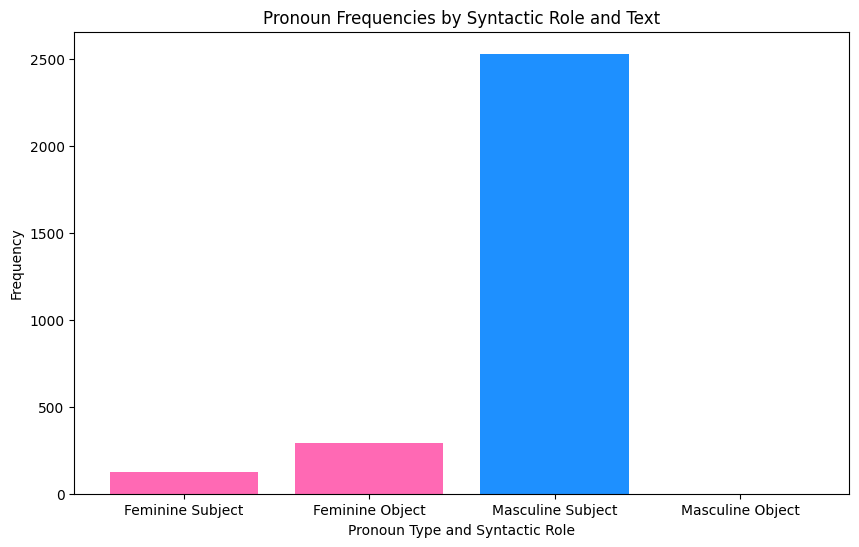

In [84]:
# Visualize the data
labels = ['Feminine Subject', 'Feminine Object', 'Masculine Subject', 'Masculine Object']
counts_data = [
    get_count(feminine_subject_count),
    get_count(feminine_object_count),
    get_count(masculine_subject_count),
    get_count(masculine_object_count)
]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts_data, color=['#FF69B4', '#FF69B4', '#1E90FF', '#1E90FF'])
plt.xlabel('Pronoun Type and Syntactic Role')
plt.ylabel('Frequency')
plt.title('Pronoun Frequencies by Syntactic Role and Text')
plt.show()

In [85]:
# Output results
print("Chi-Squared Test")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Squared Test
Chi2 Statistic: 1947.796335480638
P-value: 0.0


Visualize by book


In [86]:
# Visualization
books = ['Moby-Dick', 'Little Women', 'Little Men']
pronoun_labels = ['Feminine Subject', 'Feminine Object', 'Masculine Subject', 'Masculine Object']

# Extract counts for each book
counts_by_book = {
    book: [
        get_count(feminine_subject_counts, book),
        get_count(feminine_object_counts, book),
        get_count(masculine_subject_counts, book),
        get_count(masculine_object_counts, book)
    ] for book in books
}

NameError: name 'feminine_subject_counts' is not defined

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))

for i, book in enumerate(books):
    plt.bar(
        [x + i * 0.2 for x in range(len(pronoun_labels))],
        counts_by_book[book],
        width=0.2,
        label=book
    )

plt.xlabel('Pronoun Type and Syntactic Role')
plt.ylabel('Frequency')
plt.title('Pronoun Frequencies by Syntactic Role and Text')
plt.xticks([x + 0.2 for x in range(len(pronoun_labels))], pronoun_labels)
plt.legend()
plt.show()

#### MobyDick Exploration

In [15]:
print(mobydick[:1000])

﻿The Project Gutenberg eBook of Moby Dick; Or, The Whale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Moby Dick; Or, The Whale

Author: Herman Melville

Release date: July 1, 2001 [eBook #2701]
                Most recently updated: August 18, 2021

Language: English

Credits: Daniel Lazarus, Jonesey, and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK MOBY DICK; OR, THE WHALE ***




MOBY-DICK;

or, THE WHALE.

By Herman Melville



CONTENTS

ETYMOLOGY.

EXTRACTS (Supplied by a Sub-Sub-Librarian).

CHAPTER 1. Loomings.

CHAPTER 2. The Carpet-Bag.

CHAPTER 3. The Spouter-Inn

In [16]:
pipeline.annotate(mobydick[:100])['pos']

#Note: Processes the first 100 characters of "Moby-Dick" through the NLP pipeline to get the part-of-speech tags for each word in that text segment.

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NN',
 'NNP',
 ':',
 'CC',
 ',',
 'DT',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN',
 'DT',
 'NN',
 'IN',
 'NN',
 'DT']

In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("demo").getOrCreate()

In [18]:
mobydick = spark.sparkContext.textFile('mobydick.txt')

counts = (
    mobydick.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

#Note: performs a word count. Reads the text file, splits each line into words, maps each word to a key-value pair (word, 1), and then reduces by key to count the occurrences of each word.

In [19]:
counts.collect()[:10]

[('The', 634),
 ('Project', 80),
 ('of', 6642),
 ('Moby', 79),
 ('', 4320),
 ('ebook', 2),
 ('is', 1585),
 ('use', 36),
 ('anyone', 5),
 ('anywhere', 11)]

#### Little Women Exploration

In [22]:
print(littlewomen[:1000])

﻿The Project Gutenberg eBook of Little Women; Or, Meg, Jo, Beth, and Amy
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Little Women; Or, Meg, Jo, Beth, and Amy

Author: Louisa May Alcott

Illustrator: Frank T. Merrill

Release date: August 16, 2011 [eBook #37106]
                Most recently updated: May 22, 2023

Language: English

Credits: David Edwards, Ernest Schaal, Robert Homa, and the Online Distributed Proofreading Team


*** START OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN; OR, MEG, JO, BETH, AND AMY ***




                      [Illustration: LITTLE WOMEN
               

In [23]:
pipeline.annotate(littlewomen[:100])['pos']

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NNP',
 'NNP',
 ':',
 'CC',
 ',',
 'NNP',
 ',',
 'NNP',
 ',',
 'NNP',
 ',',
 'CC',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN',
 'DT']

In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("demo").getOrCreate()

In [25]:
littlewomen = spark.sparkContext.textFile('littlewomen.txt')

counts_lw = (
    littlewomen.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [26]:
counts_lw.collect()[:10]

[('The', 341),
 ('Project', 82),
 ('of', 3622),
 ('Women;', 3),
 ('Jo,', 406),
 ('Amy', 356),
 ('', 24604),
 ('ebook', 2),
 ('is', 758),
 ('use', 54)]

#### Littlemen Exploration

In [44]:
littlemen = open('littlemen.txt').read()

In [45]:
print(littlemen[:10000])

﻿The Project Gutenberg eBook of Little Men: Life at Plumfield With Jo's Boys
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Little Men: Life at Plumfield With Jo's Boys

Author: Louisa May Alcott

Release date: August 1, 2001 [eBook #2788]
                Most recently updated: July 12, 2024

Language: English

Credits: David Reed, and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK LITTLE MEN: LIFE AT PLUMFIELD WITH JO'S BOYS ***




LITTLE MEN: LIFE AT PLUMFIELD WITH JO'S BOYS

By Louisa May Alcott


     TO
     FREDDY AND JOHNNY,
     THE LITTLE MEN
     TO WHOM SHE OWES S

In [46]:
pipeline.annotate(littlemen[:100])['pos']

['DT',
 'NNP',
 'NNP',
 'NN',
 'IN',
 'NNP',
 'NNP',
 ':',
 'NNP',
 'IN',
 'NNP',
 'IN',
 'NNS',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN']

In [47]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("demo").getOrCreate()

In [48]:
littlemen = spark.sparkContext.textFile('littlemen.txt')

counts_lm = (
    littlemen.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)


In [49]:
counts_lm.collect()[:10]

[('The', 218),
 ('Project', 79),
 ('of', 2019),
 ('Life', 3),
 ('at', 545),
 ('Boys', 3),
 ('', 3383),
 ('ebook', 2),
 ('is', 436),
 ('use', 21)]

#### What is this?

In [35]:
import pyspark
from pyspark.sql import SparkSession
from sparknlp.base import *
from sparknlp.annotator import *
import sparknlp
from pyspark.sql.functions import col, explode, split
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Pronoun Frequency Analysis") \
    .getOrCreate()

# Initialize Spark NLP
sparknlp.start()

# Load the text of Moby Dick
!curl "https://www.gutenberg.org/cache/epub/2701/pg2701.txt" -o mobydick.txt
mobydick = open('mobydick.txt').read()

# Create DataFrame from text
mobydick = spark.createDataFrame([[txt]]).toDF("txt")

# Define Spark NLP pipeline
document_assembler = DocumentAssembler().setInputCol("text").setOutputCol("document")
tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol("token")
pos_tagger = PerceptronModel.pretrained().setInputCols(["document", "token"]).setOutputCol("pos")

pipeline = Pipeline(stages=[document_assembler, tokenizer, pos_tagger])

# Process the text
model = pipeline.fit(data)
result = model.transform(data)

# Extract tokens and POS tags
tokens_pos = result.select(explode(arrays_zip(result.token.result, result.pos.result)).alias("cols")) \
    .select(col("cols")["0"].alias("token"), col("cols")["1"].alias("pos"))

# Pronoun lists
feminine_pronouns = ['she', 'her']
masculine_pronouns = ['he', 'him']

# Count pronoun occurrences by POS tag
subject_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'PRP']
object_tags = ['PRP$', 'DT']

# Filter and count
feminine_subject_count = tokens_pos.filter((col("token").isin(feminine_pronouns)) & (col("pos").isin(subject_tags))).count()
feminine_object_count = tokens_pos.filter((col("token").isin(feminine_pronouns)) & (col("pos").isin(object_tags))).count()
masculine_subject_count = tokens_pos.filter((col("token").isin(masculine_pronouns)) & (col("pos").isin(subject_tags))).count()
masculine_object_count = tokens_pos.filter((col("token").isin(masculine_pronouns)) & (col("pos").isin(object_tags))).count()

# Prepare data for chi-squared test
data = [
    [feminine_subject_count, feminine_object_count],
    [masculine_subject_count, masculine_object_count]
]

# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(data)

# Visualize the data
labels = ['Feminine Subject', 'Feminine Object', 'Masculine Subject', 'Masculine Object']
counts = [feminine_subject_count, feminine_object_count, masculine_subject_count, masculine_object_count]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['#FF69B4', '#FF69B4', '#1E90FF', '#1E90FF'])
plt.xlabel('Pronoun Type and Syntactic Role')
plt.ylabel('Frequency')
plt.title('Pronoun Frequencies by Syntactic Role')
plt.show()

# Output results
print("Chi-Squared Test")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1246k  100 1246k    0     0  1365k      0 --:--:-- --:--:-- --:--:-- 1365k


NameError: name 'txt' is not defined

### References
1. https://tedunderwood.com/2016/12/28/the-gender-balance-of-fiction-1800-2007/